## 4. IRIS dataset has four features: sepal length, sepal width, petal length, and petal width that can be used to identify the kind of IRIS species.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Load the dataset from a CSV file
df = pd.read_csv('Iris.csv')

In [3]:
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
# Exclude the "Id" and "Species" columns and keep only the feature columns
# You can select the columns you want to include in PCA
feature_columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
X = df[feature_columns].values
y = df["Species"].values

In [6]:
print(X[:10])
print(y[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [7]:
# Standardize the feature data
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [8]:
np.random.seed(42)

### (a) Perform PCA on the given dataset and reduce the dimension to two

In [9]:
# SVD
U,S,Vt = np.linalg.svd(X_scaled)

In [10]:
# Function to get the principal components 
def get_principal_comps (X, Vt,n):
    # X: data matrix, Vt: right singular matrix
    PC = X@(Vt.T)
    return PC[:,:n]

# Function to reconstruct the images 
def reconstruct_data_mat (PC, Vt,n):
    # PC: principal components. Vt: Right singular matrix
    X_ = PC@(Vt[:n, :])
    return X_

In [11]:
n_reduced = 2
PC_reduced = get_principal_comps(X_scaled,Vt,n_reduced)

In [12]:
print(PC_reduced)

[[-2.26454173e+00 -5.05703903e-01]
 [-2.08642550e+00  6.55404729e-01]
 [-2.36795045e+00  3.18477311e-01]
 [-2.30419716e+00  5.75367713e-01]
 [-2.38877749e+00 -6.74767397e-01]
 [-2.07053681e+00 -1.51854856e+00]
 [-2.44571134e+00 -7.45626750e-02]
 [-2.23384186e+00 -2.47613932e-01]
 [-2.34195768e+00  1.09514636e+00]
 [-2.18867576e+00  4.48629048e-01]
 [-2.16348656e+00 -1.07059558e+00]
 [-2.32737775e+00 -1.58587455e-01]
 [-2.22408272e+00  7.09118158e-01]
 [-2.63971626e+00  9.38281982e-01]
 [-2.19229151e+00 -1.88997851e+00]
 [-2.25146521e+00 -2.72237108e+00]
 [-2.20275048e+00 -1.51375028e+00]
 [-2.19017916e+00 -5.14304308e-01]
 [-1.89407429e+00 -1.43111071e+00]
 [-2.33994907e+00 -1.15803343e+00]
 [-1.91455639e+00 -4.30465163e-01]
 [-2.20464540e+00 -9.52457317e-01]
 [-2.77416979e+00 -4.89517027e-01]
 [-1.82041156e+00 -1.06750793e-01]
 [-2.22821750e+00 -1.62186163e-01]
 [-1.95702401e+00  6.07892567e-01]
 [-2.05206331e+00 -2.66014312e-01]
 [-2.16819365e+00 -5.52016495e-01]
 [-2.14030596e+00 -3

In [13]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### (b) Plot the newly obtained features (Principal components) discriminating the species type

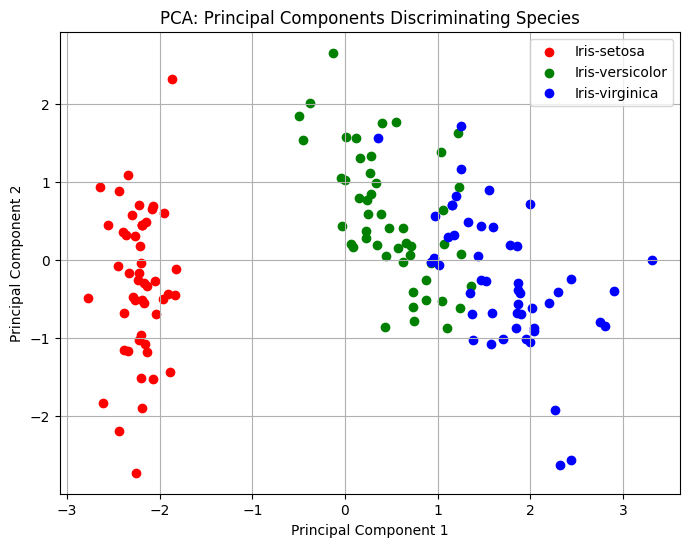

In [15]:
# Add the "Species" column back to the PCA results
X_pca_with_species = pd.DataFrame(data=PC_reduced, columns=["PC1", "PC2"])
X_pca_with_species["Species"] = df["Species"]

# Create a scatter plot for PCA results discriminating by species
species_labels = df["Species"].unique()
colors = ['r', 'g', 'b']  # Define colors for each species

plt.figure(figsize=(8, 6))
for i, species in enumerate(species_labels):
    subset = X_pca_with_species[X_pca_with_species["Species"] == species]
    plt.scatter(subset["PC1"], subset["PC2"], c=colors[i], label=species)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: Principal Components Discriminating Species")
plt.legend()
plt.grid(True)
plt.show()

### (c) Identify which one of the four features can be used to discriminate between the species (Use the coefficient of principal components to answer)

In [16]:
# Get the coefficients (loadings) of the original features in PC1
coefficients_pc1 = Vt[0, :]  # Assuming Vt is the right singular matrix from SVD

# Create a DataFrame to display the coefficients for each feature
coefficients_df1 = pd.DataFrame(data={'Feature': feature_columns, 'Coefficient_PC1': coefficients_pc1})

# Find the feature with the highest absolute coefficient in PC1
most_discriminative_feature1 = coefficients_df1.loc[coefficients_df1['Coefficient_PC1'].abs().idxmax()]

print("Coefficients of Features in PC1:")
print(coefficients_df1)

Coefficients of Features in PC1:
         Feature  Coefficient_PC1
0  SepalLengthCm         0.522372
1   SepalWidthCm        -0.263355
2  PetalLengthCm         0.581254
3   PetalWidthCm         0.565611


In [20]:
print("\nMost Discriminative Feature in PC1 and overall is:")
print(f"Feature: {most_discriminative_feature1['Feature']:15s} Weight (Coefficient): {most_discriminative_feature1['Coefficient_PC1']:.6f}")


Most Discriminative Feature in PC1 and overall is:
Feature: PetalLengthCm   Weight (Coefficient): 0.581254


### Therefore, the most discriminative feature overall should be PetalLengthCm because it has the highest weight on the First Principal Component. 

#### Similarly we can take the variable with highest weight on second component (SepalWidthCm), but however it is not very relevant because it is only the second principal component.

In [21]:
# Get the coefficients (loadings) of the original features in PC1
coefficients_pc2 = Vt[1, :]  # Assuming Vt is the right singular matrix from SVD

# Create a DataFrame to display the coefficients for each feature
coefficients_df2 = pd.DataFrame(data={'Feature': feature_columns, 'Coefficient_PC2': coefficients_pc2})

# Find the feature with the highest absolute coefficient in PC1
most_discriminative_feature2 = coefficients_df2.loc[coefficients_df2['Coefficient_PC2'].abs().idxmax()]

print("Coefficients of Features in PC2:")
print(coefficients_df2)

Coefficients of Features in PC2:
         Feature  Coefficient_PC2
0  SepalLengthCm        -0.372318
1   SepalWidthCm        -0.925556
2  PetalLengthCm        -0.021095
3   PetalWidthCm        -0.065416


### Verification

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset from a CSV file
df = pd.read_csv('Iris.csv')

feature_columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
X = df[feature_columns].values
y = df["Species"].values

# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA and reduce dimension to two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Get the coefficients (loadings) of original features for the two principal components
coefficients = pca.components_

# Analyze coefficients to find which features contribute the most to each component
for i, component in enumerate(coefficients):
    print(coefficients[i])
    most_discriminative_feature = feature_columns[np.argmax(np.abs(component))]
    print(f"Principal Component {i + 1}: Most Discriminative Feature: {most_discriminative_feature}")

[ 0.52237162 -0.26335492  0.58125401  0.56561105]
Principal Component 1: Most Discriminative Feature: PetalLengthCm
[0.37231836 0.92555649 0.02109478 0.06541577]
Principal Component 2: Most Discriminative Feature: SepalWidthCm
